In [ ]:
'''
Lasso Regression (L1 Regularization): Lasso or Ridge regression is basically Shrinkage(regularization) techniques, which uses 
                                      different parameters and values to shrink or penalize the coefficients
                                      
# Objective = RSS + α * (sum of absolute value of coefficients)
# RSS : Here RSS refers to ‘Residual Sum of Squaresk’ which is nothing but the sum of square of errors between the predicted 
        and actual values in the training data set.

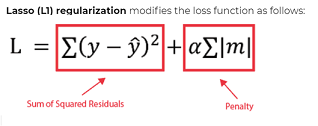

In [ ]:
'''
Hyperparameters :
    -  α (alpha)  : (Regularization Parameter)
        - If Alpha is close to zero,Model will same as OSS or Linear Regression
        - If Alpha is too large, the impact of shrinkage grows and the coefficients B1, B2 ... Bn tends to zero

In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Advertising.csv")
data = data.drop('Unnamed: 0',axis = 1)

X = data.iloc[:,0:1]
y = data.iloc[:,-1]

#plt.scatter(X,y)

# Using Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
pred = model.predict(y[:,np.newaxis])
pd.DataFrame(zip(y,pred))
from sklearn import metrics
print("MSE for Linear Regression:",metrics.mean_squared_error(y,pred))


# Using Ridge Regression(L2)
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso(normalize=True,alpha=0.01)
lasso.fit(X,y)
pred_lasso = lasso.predict(X)

print("MSE for Lasso:",metrics.mean_squared_error(y,pred_lasso))

# pd.DataFrame(zip(y,pred_ridge,pred),columns=["Actual","Predicted_Ridge","Predicted_Linear"])
pd.DataFrame(zip(y,pred,pred_lasso,(pred -y),(pred_lasso - y)),columns=["Actual","Predicted_Linear","Predicted_Lasso",\
                                                                        "Error_Linear","Error_Lasso"])


MSE for Linear Regression: 64.55624502970082
MSE for Lasso: 10.532652915656756


,Actual,Predicted_Linear,Predicted_Lasso,Error_Linear,Error_Lasso
0,22.1,8.083153,17.833617,-14.016847,-4.266383
1,10.4,7.526975,9.317309,-2.873025,-1.082691
2,9.3,7.474684,8.064640,-1.825316,-1.235360
3,18.5,7.912021,14.227034,-10.587979,-4.272966
4,12.9,7.645816,15.571472,-5.254184,2.671472
...,...,...,...,...,...
195,7.6,7.393872,9.028231,-0.206128,1.428231
196,9.7,7.493699,11.597807,-2.206301,1.897807
197,12.8,7.641063,15.397108,-5.158937,2.597108
198,25.5,8.244778,20.288479,-17.255222,-5.211521


### How alpha value pushing coefficients to Zero

In [5]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
scaler = StandardScaler()
X = scaler.fit_transform(boston["data"])
Y = boston["target"]
names = boston["feature_names"]

# Create a function called lasso,
def lasso(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = names
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        lasso = Lasso(alpha=alpha)
        
        # Fit the lasso regression
        lasso.fit(X, Y)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = lasso.coef_
        
    # Return the datafram    
    return df

# Run the function called, Lasso
lasso([.0001, .5, 10])

,Feature Name,Alpha = 0.000100,Alpha = 0.500000,Alpha = 10.000000
0,CRIM,-0.927866,-0.115265,-0.0
1,ZN,1.081086,0.000000,0.0
2,INDUS,0.139960,-0.000000,-0.0
3,CHAS,0.681771,0.397079,0.0
4,NOX,-2.055877,-0.000000,-0.0
5,RM,2.674402,2.974259,0.0
6,AGE,0.019026,-0.000000,-0.0
7,DIS,-3.103667,-0.170569,0.0
8,RAD,2.660381,-0.000000,-0.0
9,TAX,-2.074993,-0.000000,-0.0
